In [1]:
#KNN

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/ISHWAR KHEDKAR/Downloads/customer_purchases.csv")

In [5]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

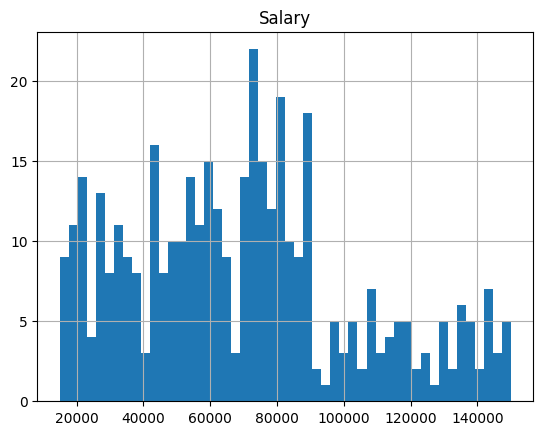

In [11]:
df.hist(column='Salary', bins=50)

In [43]:
df.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

In [54]:
X = df[['Age','Salary']] .values  #.astype(float)
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [55]:
y = df['Purchased'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [56]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [57]:
#train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (200, 2) (200,)
Test set: (200, 2) (200,)


In [58]:
#KNN algorithm import
from sklearn.neighbors import KNeighborsClassifier

In [59]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [60]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [61]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.925
Test set Accuracy:  0.865


In [62]:
#calculate the accuracy of KNN
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.865, 0.825, 0.88 , 0.89 , 0.89 , 0.87 , 0.865, 0.87 , 0.905])

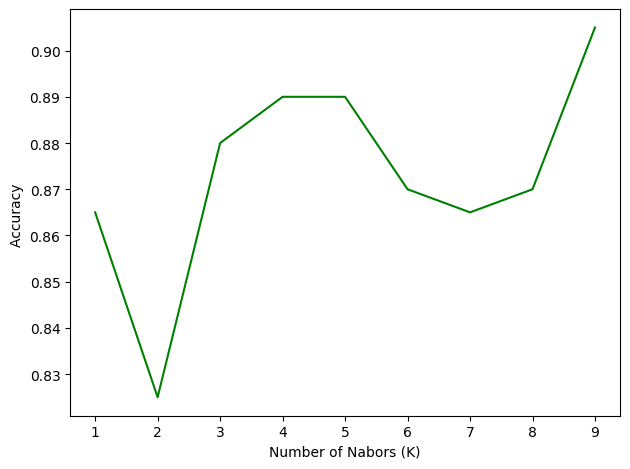

In [63]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [64]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.905 with k= 9
